In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data=pd.read_csv(r"D:\machine_learning\data\titanic_cleaned.csv")
data.shape

(891, 25)

In [87]:
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [88]:
data.isnull().sum()

Survived      0
Age           0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
SibSp_0       0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Parch_0       0
Parch_1       0
Parch_2       0
Parch_3       0
Parch_4       0
Parch_5       0
Parch_6       0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

## Implementing hold-out validation

### Creating validation and test set

In [89]:
data_x=data.drop(["Survived"],axis=1)
data_y=data["Survived"]

from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(data_x,data_y,test_size=0.2,random_state=50, stratify=data_y)


In [90]:
train_x,validation_x,train_y,validation_y=train_test_split(train_x,train_y,test_size=0.2,random_state=50,stratify=train_y)

In [91]:
print("train data ",train_x.shape,train_y.shape)
print("validation data ",validation_x.shape,validation_y.shape)
print("test data ",test_x.shape,test_y.shape)

train data  (569, 24) (569,)
validation data  (143, 24) (143,)
test data  (179, 24) (179,)


In [92]:
train_y.value_counts()/len(train_y)

0    0.616872
1    0.383128
Name: Survived, dtype: float64

In [93]:
validation_y.value_counts()/len(validation_y)

0    0.615385
1    0.384615
Name: Survived, dtype: float64

In [94]:
test_y.value_counts()/len(test_y)

0    0.614525
1    0.385475
Name: Survived, dtype: float64

## Implementing k fold-validation

### Creating validation and test set

In [95]:
data_x=data.drop(["Survived"],axis=1)
data_y=data["Survived"]

In [96]:
#scale the value to  implement k fold validation
from sklearn.preprocessing import StandardScaler
data_x=StandardScaler().fit_transform(data_x)

In [97]:
#creating data set
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(data_x,data_y,random_state=96,stratify=data_y)

## Importing KNN

In [98]:
from sklearn.neighbors import KNeighborsClassifier as KNN

### Checking consistancy,using cross validation

In [99]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(KNN(n_neighbors=3),X=train_x,y=train_y,cv=10)
score

array([0.76119403, 0.74626866, 0.76119403, 0.7761194 , 0.65671642,
       0.80597015, 0.8358209 , 0.80597015, 0.81818182, 0.74242424])

In [100]:
score.mean()*100,score.std()*100

(77.09859791949344, 4.856044270804294)

### Automating processing of the cross valoidation for K neighobors

In [108]:
def val_score(n_neighbors):
    #takes input as N_neighbors
    mea=[]
    sd=[]
    for i in n_neighbors:
        #getting the corss validation score
        score=cross_val_score(KNN(n_neighbors=i),X=train_x,y=train_y,cv=10)
        mea.append(score.mean())
        sd.append(score.std())
        
    return mea,sd

In [110]:
n_neighbors=range(1,50)
mean,std=val_score(n_neighbors)

Text(0.5, 1.0, 'Mean validation score')

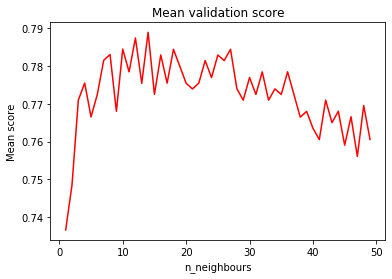

In [111]:
plt.plot(n_neighbors,mean,color="red")
plt.xlabel("n_neighbours")
plt.ylabel("Mean score")
plt.title("Mean validation score")

Text(0.5, 1.0, 'Mean validation score')

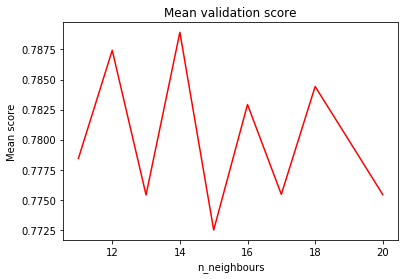

In [112]:
plt.plot(n_neighbors[10:20],mean[10:20],color="red")
plt.xlabel("n_neighbours")
plt.ylabel("Mean score")
plt.title("Mean validation score")

Text(0.5, 1.0, 'Standard deviation validation score')

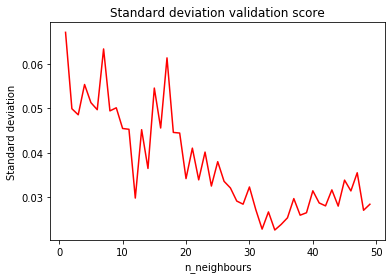

In [113]:
plt.plot(n_neighbors,std,color="red")
plt.xlabel("n_neighbours")
plt.ylabel("Standard deviation")
plt.title("Standard deviation validation score")

Text(0.5, 1.0, 'Standard deviation validation score')

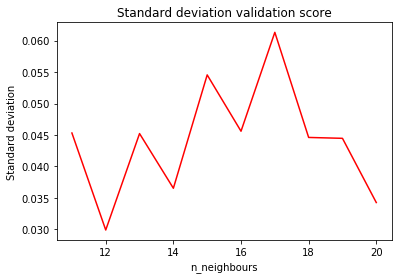

In [114]:
plt.plot(n_neighbors[10:20],std[10:20],color="red")
plt.xlabel("n_neighbours")
plt.ylabel("Standard deviation")
plt.title("Standard deviation validation score")

In [115]:
#testing for unkonown data
#using train data
clf=KNN(n_neighbors=14)
clf.fit(train_x,train_y)
score1=clf.score(train_x,train_y)
#using test data
score2=clf.score(test_x,test_y)
score1,score2

(0.811377245508982, 0.8161434977578476)